In [4]:
# http://mattdturner.com/wordpress/2018/08/create-a-buffett-indicator-plot-in-python/

In [5]:
# Import necessary packages
import datetime
import pandas as pd
import pandas_datareader.data as web
from dateutil.relativedelta import relativedelta

In [6]:
end = datetime.datetime.now()
start = end - relativedelta(years=3)

In [7]:
gdp = web.DataReader('GDP', 'fred', start, end)
wilshire = web.DataReader('WILL5000PR','fred',start,end)

In [8]:
print(gdp.tail())
print(wilshire.tail())

                  GDP
DATE                 
2019-10-01  21747.394
2020-01-01  21561.139
2020-04-01  19520.114
2020-07-01  21170.252
2020-10-01  21494.731
            WILL5000PR
DATE                  
2021-03-25    40798.60
2021-03-26    41467.50
2021-03-29    41300.85
2021-03-30    41259.22
2021-03-31    41465.83


In [9]:
combined = pd.concat([gdp,wilshire],axis=1)

In [10]:
print(combined.tail())

            GDP  WILL5000PR
DATE                       
2021-03-25  NaN    40798.60
2021-03-26  NaN    41467.50
2021-03-29  NaN    41300.85
2021-03-30  NaN    41259.22
2021-03-31  NaN    41465.83


In [11]:
# Get a list of dates available in the GDP dataframe
gdp_dates = gdp.index.values

# Loop through the dgp dates and fill the GDP column in the combined dataframe
prev_date = None
for date in gdp_dates:
    if prev_date == None:
        combined.loc[:date,'GDP'] = gdp.loc[date,'GDP']
    else:
        combined.loc[date_prev:date,'GDP'] = gdp.loc[date_prev,'GDP']
    date_prev = date
    
combined.loc[date:,'GDP'] = gdp.loc[date,'GDP']

In [12]:
print(combined.tail())

                  GDP  WILL5000PR
DATE                             
2021-03-25  21494.731    40798.60
2021-03-26  21494.731    41467.50
2021-03-29  21494.731    41300.85
2021-03-30  21494.731    41259.22
2021-03-31  21494.731    41465.83


In [13]:
combined['Buffett_Indicator'] = combined.WILL5000PR / combined.GDP * 100
print(combined.tail())

                  GDP  WILL5000PR  Buffett_Indicator
DATE                                                
2021-03-25  21494.731    40798.60         189.807446
2021-03-26  21494.731    41467.50         192.919372
2021-03-29  21494.731    41300.85         192.144065
2021-03-30  21494.731    41259.22         191.950390
2021-03-31  21494.731    41465.83         192.911602


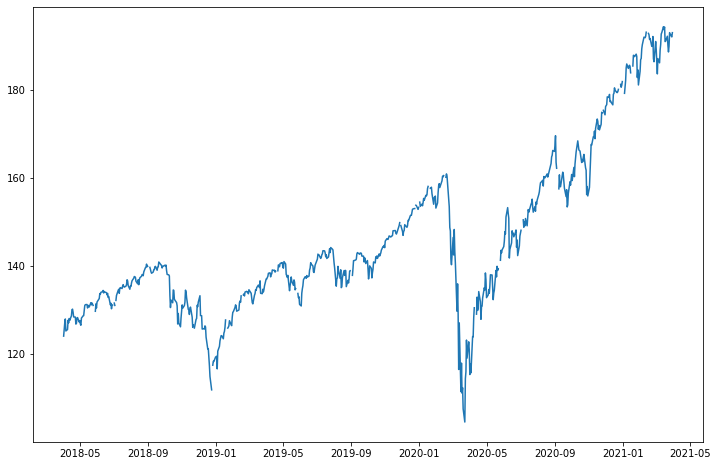

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))

# Get the starting and ending date
min_date = combined.index.values[0]
max_date = combined.index.values[-1]
num_dates = len(combined.index.values)
quarter_date = combined.index.values[int(num_dates/4)]
three_quarter_date = combined.index.values[int(3*num_dates/4)]

plt.plot(combined.index.values,combined.Buffett_Indicator)

plt.show()

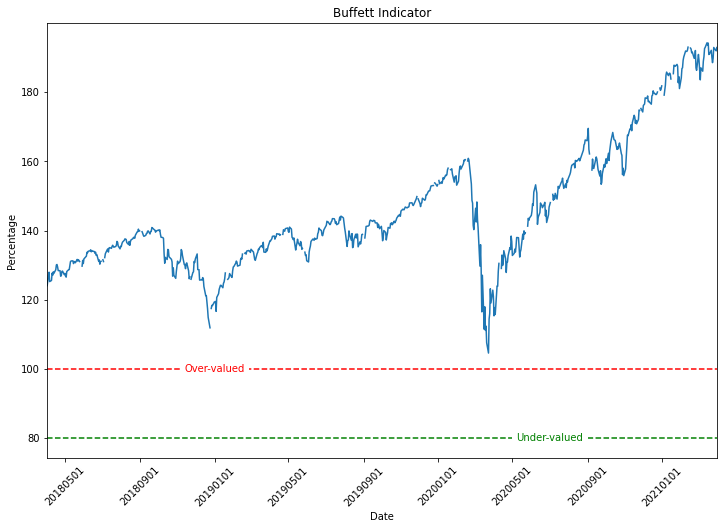

In [15]:
fig = plt.figure(figsize=(12,8))

plt.plot(combined.index.values,combined.Buffett_Indicator)

ax = plt.gca()

import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%Y%m%d')
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel('Date')
ax.set_ylabel('Percentage')
ax.set_title('Buffett Indicator')
ax.set_xlim(min_date,max_date)

# Rotate the x-tick labels so that they are more legible
plt.xticks(rotation=45)

# Add the horizontal lines
plt.hlines(100,min_date,max_date,colors='r',linestyle='dashed')
plt.hlines(80,min_date,max_date,colors='g',linestyle='dashed')

plt.text(quarter_date,100,'Over-valued',ha='center',va='center',color='r',backgroundcolor='white')
plt.text(three_quarter_date,80,'Under-valued',ha='center',va='center',color='g',backgroundcolor='white')

plt.show()